### CREATING A SIMPLE TRADING STRATEGY
---

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Adding MA10 and MA50

In [2]:
fb = pd.read_csv("../data/facebook.csv", index_col=0)
fb["MA10"] = fb["Close"].rolling(10).mean()
fb["MA50"] = fb["Close"].rolling(50).mean()
fb = fb.dropna()

### Adding share/profit

In [3]:
fb["Share"] = [1 if fb["MA10"].loc[indice] > fb["MA50"].loc[indice] else 0 for indice in fb.index]

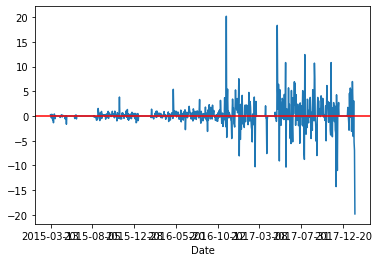

In [4]:
fb["Close_tommorow"] = fb["Close"].shift(-1)
fb["Profit"] = [fb["Close_tommorow"].loc[indice] - fb["Close"].loc[indice]
    if fb["Share"].loc[indice] == 1 else 0 for indice in fb.index]
fb["Profit"].plot()
plt.axhline(y=0, color="red")
plt.show()

### Adding wealth

In [7]:
fb["Wealth"] = fb["Profit"].cumsum()
fb.head(2)

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Share,Close_tommorow,Profit,Wealth
Date,,,,,,,,,,,,
2015-03-13,22.559999,22.760000,22.25,22.700001,22.116024,8982200,22.648,21.0174,1,22.969999,0.269998,0.269998
2015-03-16,22.879999,23.110001,22.73,22.969999,22.379078,5923900,22.685,21.0758,1,23.250000,0.280001,0.549999


### Plots

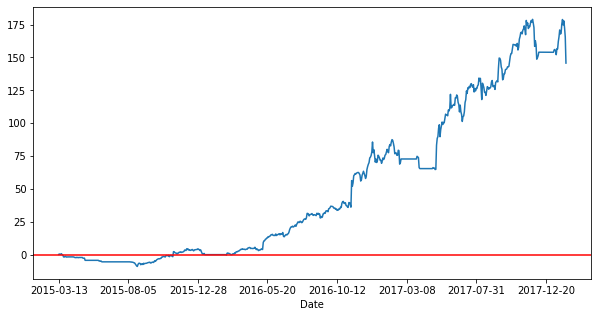

In [10]:
plt.figure(figsize=(10, 5))
fb["Wealth"].plot()
plt.axhline(y=0, color="red")
plt.show()